<a href="https://colab.research.google.com/github/devkyber/mnist-cnn/blob/main/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7723 - loss: 0.7103 - val_accuracy: 0.9819 - val_loss: 0.0635
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9613 - loss: 0.1288 - val_accuracy: 0.9852 - val_loss: 0.0431
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9720 - loss: 0.0927 - val_accuracy: 0.9895 - val_loss: 0.0337
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9784 - loss: 0.0732 - val_accuracy: 0.9932 - val_loss: 0.0224
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9807 - loss: 0.0658 - val_accuracy: 0.9921 - val_loss: 0.0243
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9827 - loss: 0.0610 - val_accuracy: 0.9948 - val_loss: 0.0171
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc

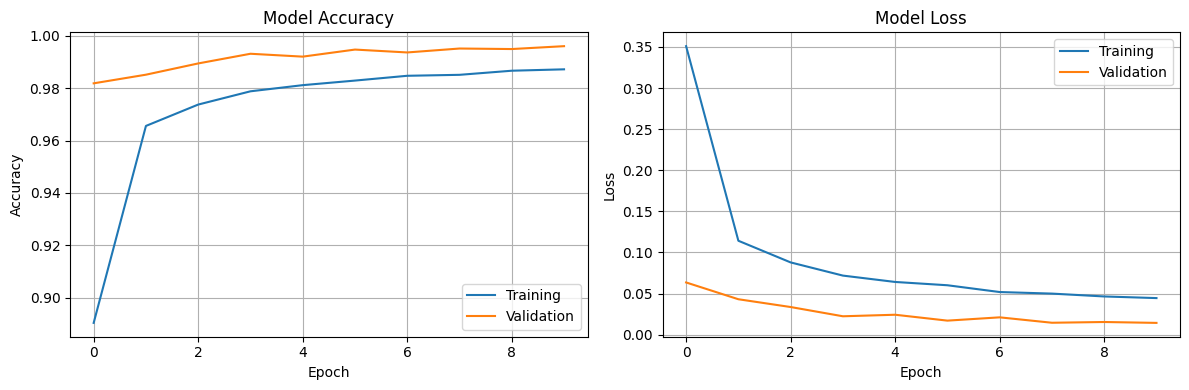

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


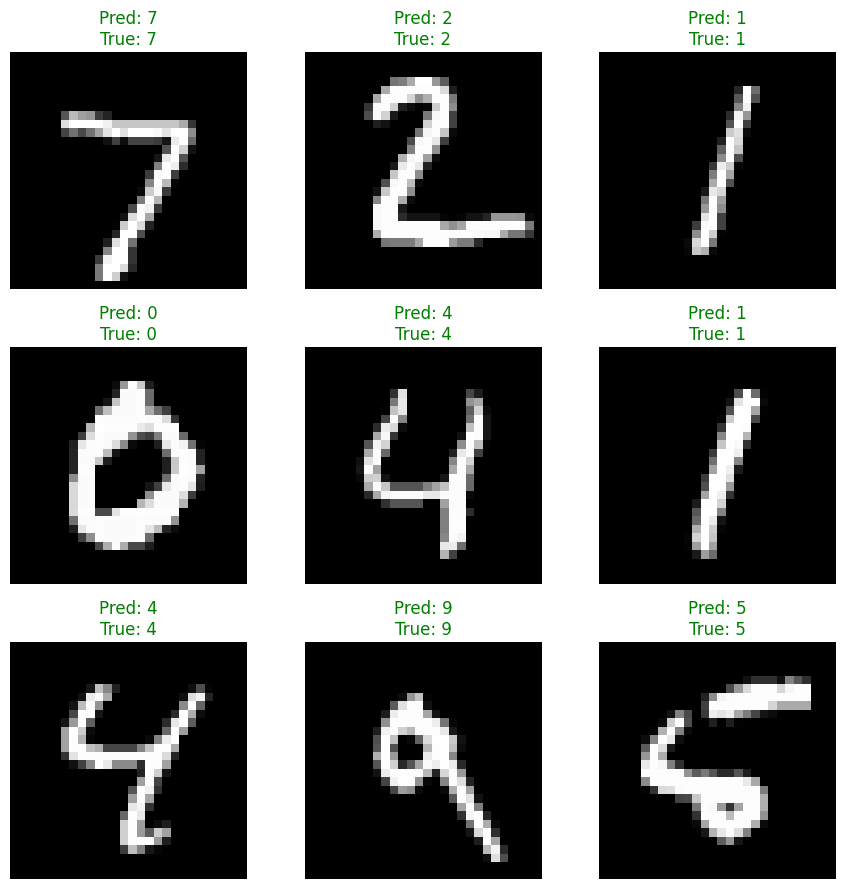

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

mnist = tf.keras.datasets.mnist

def data_pipeline():
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    # Normalize
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # Add channel dimension
    train_images = train_images[..., tf.newaxis].astype("float32")
    test_images = test_images[..., tf.newaxis].astype("float32")

    # Create datasets
    train_ds = tf.data.Dataset.from_tensor_slices(
        (train_images, train_labels)).shuffle(10000).batch(32)
    test_ds = tf.data.Dataset.from_tensor_slices(https://github.com/devkyber/Test-Blog-/blob/main/cnn_mnist.ipynb
        (test_images, test_labels)).batch(32)

    return train_ds, test_ds

def cnn_model():
    model = models.Sequential([
        # First conv block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second conv block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third conv block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),

        # Classification
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # Compile
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, train_ds, test_ds, epochs=10):
    history = model.fit(train_ds,
                       epochs=epochs,
                       validation_data=test_ds,
                       verbose=1)
    return history

def evaluate_model(model, test_ds):
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")
    return test_loss, test_accuracy

def plot_results(history, model, test_ds):
    # 1. Plot training curves (accuracy and loss)
    plt.figure(figsize=(12, 4))

    # Left plot: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Right plot: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # 2. Show sample predictions
    # Get some test images
    for images, labels in test_ds.take(1):
        break

    # Make predictions on first 9 images
    predictions = model.predict(images[:9])
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = labels[:9].numpy()

    # Create 3x3 grid
    plt.figure(figsize=(9, 9))

    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')

        # Green if correct, red if wrong
        if predicted_labels[i] == true_labels[i]:
            color = 'green'
        else:
            color = 'red'

        plt.title(f'Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}', color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    """Main training pipeline"""
    print("TensorFlow version:", tf.__version__)
    print("GPU available:", tf.config.list_physical_devices('GPU'))

    # Load data
    train_ds, test_ds = data_pipeline()

    # Create and train model
    model = cnn_model()
    history = train_model(model, train_ds, test_ds, epochs=10)

    # Evaluate and visualize
    evaluate_model(model, test_ds)
    plot_results(history, model, test_ds)

if __name__ == "__main__":
    main()



